#### **LOAD THE LIBARAIES**

In [ ]:
#load the necessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import ast


#### **LOAD THE DATASET**

In [ ]:
movie = pd.read_csv('movie.csv')

In [ ]:
movie.head()

,title,imdb_id,release_date,budget,revenue,tmdb_rating,vote_count,runtimeMinutes,imdb_rating,avg_cast_rating,director_rating,writer_rating,composer_rating,cinematographer_rating,editor_rating,genre
0,Once Upon a Time... in Hollywood,tt7131622,2019-07-24,95000000,392105159,7.426,14234,161,7.6,7.35,7.60,7.60,NaN,7.13,7.39,"Comedy, Drama, Thriller"
1,Pain and Glory,tt8291806,2019-03-22,10769016,37359689,7.382,1849,113,7.5,7.22,7.23,7.23,7.24,7.10,7.06,Drama
2,Taxi 5,tt7238392,2017-01-19,20390000,64497208,5.398,1049,102,4.6,4.78,4.96,5.31,4.60,5.25,6.53,"Action, Comedy, Crime"
3,Wonder Park,tt6428676,2019-03-13,100000000,119559110,6.529,727,85,5.9,6.29,NaN,5.99,6.47,5.90,6.22,"Adventure, Animation, Comedy, Family, Fantasy"
4,The King of Kings,tt7967302,2025-04-07,25200000,66465461,8.600,102,103,6.8,6.86,6.80,6.53,6.56,6.80,6.80,"Adventure, Animation, Drama, Family, Fantasy"


In [ ]:
print(movie.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1373 entries, 0 to 1372
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   1373 non-null   object 
 1   imdb_id                 1373 non-null   object 
 2   release_date            1373 non-null   object 
 3   budget                  1373 non-null   int64  
 4   revenue                 1373 non-null   int64  
 5   tmdb_rating             1373 non-null   float64
 6   vote_count              1373 non-null   int64  
 7   runtimeMinutes          1373 non-null   int64  
 8   imdb_rating             1373 non-null   float64
 9   avg_cast_rating         1370 non-null   float64
 10  director_rating         1371 non-null   float64
 11  writer_rating           1371 non-null   float64
 12  composer_rating         1321 non-null   float64
 13  cinematographer_rating  1312 non-null   float64
 14  editor_rating           1352 non-null   

In [ ]:
movie.describe()

,budget,revenue,tmdb_rating,vote_count,runtimeMinutes,imdb_rating,avg_cast_rating,director_rating,writer_rating,composer_rating,cinematographer_rating,editor_rating
count,1.373000e+03,1.373000e+03,1373.000000,1373.000000,1373.000000,1373.000000,1370.000000,1371.000000,1371.000000,1321.000000,1312.000000,1352.000000
mean,4.205404e+07,1.038718e+08,6.684362,2058.007283,117.437728,6.377422,6.477606,6.452983,6.448928,6.491378,6.487569,6.492692
std,5.921641e+07,2.474386e+08,0.848751,3077.486112,23.933306,1.041710,0.764186,0.950225,0.923550,0.833022,0.866489,0.858914
min,1.000000e+00,0.000000e+00,0.000000,0.000000,53.000000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000
25%,7.000000e+06,1.120191e+06,6.255000,315.000000,100.000000,5.800000,6.140000,6.000000,5.985000,6.080000,6.080000,6.060000
50%,2.000000e+07,1.816093e+07,6.764000,921.000000,112.000000,6.500000,6.530000,6.530000,6.520000,6.600000,6.585000,6.560000
75%,5.000000e+07,8.246870e+07,7.200000,2513.000000,131.000000,7.100000,6.930000,7.095000,7.080000,7.020000,7.040000,7.040000
max,5.839000e+08,2.799439e+09,10.000000,31060.000000,242.000000,8.900000,8.820000,8.900000,8.900000,8.900000,8.900000,8.900000


#### **DATA PREPROCESSING**

**HANDLING MISSING VALUES**

Since only considering movies, removing documentary and biography

In [ ]:
movie.dtypes

,0
title,object
imdb_id,object
release_date,object
budget,int64
revenue,int64
tmdb_rating,float64
vote_count,int64
runtimeMinutes,int64
imdb_rating,float64
avg_cast_rating,float64


In [ ]:
#removing documentary and biography
movie = movie[~movie['genre'].str.contains('Documentary|Biography')]

In [ ]:
movie.shape

(1238, 16)

In [ ]:
# Shows rows where at least one column is null
null_rows = movie[movie.isnull().any(axis=1)]
null_rows


,title,imdb_id,release_date,budget,revenue,tmdb_rating,vote_count,runtimeMinutes,imdb_rating,avg_cast_rating,director_rating,writer_rating,composer_rating,cinematographer_rating,editor_rating,genre
0,Once Upon a Time... in Hollywood,tt7131622,2019-07-24,95000000,392105159,7.426,14234,161,7.6,7.35,7.60,7.60,NaN,7.13,7.39,"Comedy, Drama, Thriller"
3,Wonder Park,tt6428676,2019-03-13,100000000,119559110,6.529,727,85,5.9,6.29,NaN,5.99,6.47,5.90,6.22,"Adventure, Animation, Comedy, Family, Fantasy"
37,Paws of Fury: The Legend of Hank,tt4428398,2022-07-14,45000000,42500000,6.654,319,98,5.7,6.15,5.70,5.70,5.90,NaN,8.26,"Action, Adventure, Animation, Comedy, Family"
80,The Secret Life of Pets 2,tt5113040,2019-05-24,80000000,429434163,6.950,3217,86,6.4,6.38,6.40,6.46,7.01,NaN,6.30,"Adventure, Animation, Comedy, Family"
86,The Dawn,tt7461372,2019-09-27,110000,0,6.045,56,90,3.3,3.49,3.24,3.27,NaN,3.30,3.27,"Drama, Horror, Thriller"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,A Little Something Extra,tt30795948,2024-04-18,6400000,84058132,7.126,778,99,7.0,7.00,6.69,6.90,NaN,7.00,7.00,Comedy
1348,Jai Mata ji - lets Rock,tt35705898,2025-05-09,585317,0,0.000,0,118,6.9,6.75,6.90,6.84,NaN,6.90,6.90,"Comedy, Drama, Family"
1349,Mahavatar Narsimha,tt34365591,2025-07-25,4700000,36000000,7.824,17,130,8.7,8.70,8.70,8.70,7.69,NaN,8.70,"Action, Animation, Drama, Fantasy"
1357,The Great Battle,tt6931414,2018-09-19,13305000,41509280,6.798,178,136,7.0,6.67,7.00,7.00,NaN,7.00,7.08,"Action, Drama, History, War"


In [ ]:
#removing the missing values
df = movie.dropna()

In [ ]:
df.shape

(1130, 16)

#### **LINEAR REGRESSION FOR ANALYSING RATINGS**

In [ ]:
#define the features
df_x = df[['runtimeMinutes', 'vote_count', 'avg_cast_rating', 'director_rating', 'writer_rating', 'composer_rating', 'cinematographer_rating', 'editor_rating', 'revenue', 'budget']]

#define the target
df_y = df[['tmdb_rating', 'imdb_rating']]

In [ ]:
data = df[['runtimeMinutes', 'vote_count', 'director_rating', 'writer_rating', 'composer_rating', 'cinematographer_rating', 'editor_rating', 'tmdb_rating', 'imdb_rating', 'revenue', 'budget']]

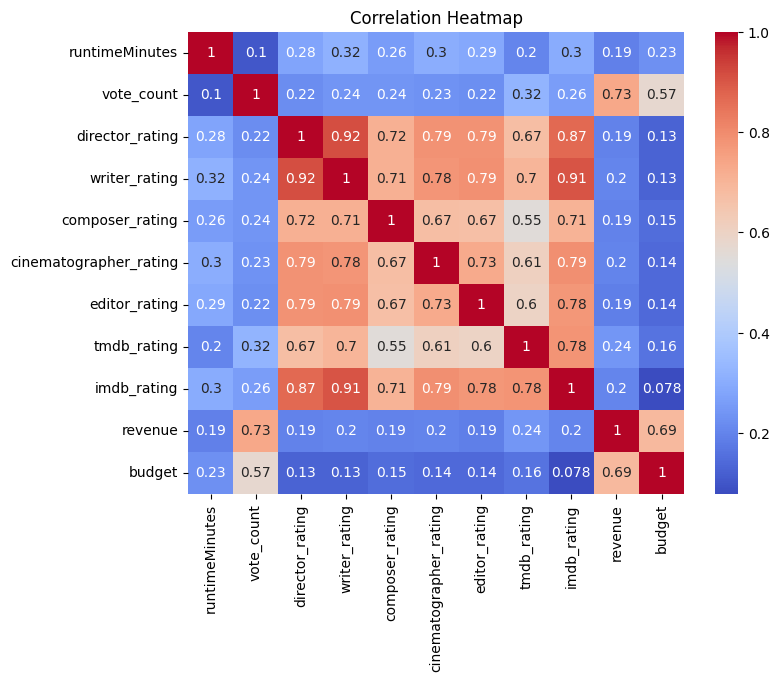

In [ ]:

corr = data.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Scale features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df_x)

#### **MODELLING THE ALGORITHM (LINEAR REGRESSION)**

In [ ]:
#split the data into training and testing sets (80% training and 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, df_y, test_size=0.2, random_state=42)

In [ ]:
model = MultiOutputRegressor(LinearRegression())
#model
model.fit(x_train, y_train)

#make predictions
y_pred = model.predict(x_test)

In [ ]:
#evaluate the model
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

In [ ]:
#printing the values
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.24710027427096906
R-squared: 0.6895618893579851


In [ ]:
for i, estimator in enumerate(model.estimators_):
    print(f"Target {df_y.columns[i]} coefficients:")
    for feature, coef in zip(df_x.columns, estimator.coef_):
        print(f"  {feature}: {coef:.3f}")
    print()


Target tmdb_rating coefficients:
  runtimeMinutes: -0.029
  vote_count: 0.122
  avg_cast_rating: 0.389
  director_rating: 0.050
  writer_rating: 0.169
  composer_rating: -0.005
  cinematographer_rating: 0.007
  editor_rating: 0.003
  revenue: -0.009
  budget: -0.004

Target imdb_rating coefficients:
  runtimeMinutes: 0.004
  vote_count: 0.049
  avg_cast_rating: 0.627
  director_rating: 0.044
  writer_rating: 0.280
  composer_rating: 0.003
  cinematographer_rating: 0.039
  editor_rating: 0.026
  revenue: 0.030
  budget: -0.089



This output correlates with the heatmap

**VISUALIZING**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine your coefficients into a dictionary
coef_data = {
    'Feature': ['runtimeMinutes', 'vote_count', 'avg_cast_rating', 'director_rating', 'writer_rating',
                 'composer_rating', 'cinematographer_rating', 'editor_rating', 'revenue', 'budget'],
    'TMDB': [-0.029, 0.122, 0.0389, 0.050, 0.169, -0.005, 0.007, 0.003, -0.009, -0.004],
    'IMDB': [0.004, 0.049, 0.627, 0.044, 0.280, 0.003, 0.039, 0.026, 0.030, -0.089]
}

coef_df = pd.DataFrame(coef_data)
coef_df.set_index('Feature', inplace=True)
coef_df


,TMDB,IMDB
Feature,,
runtimeMinutes,-0.0290,0.004
vote_count,0.1220,0.049
avg_cast_rating,0.0389,0.627
director_rating,0.0500,0.044
writer_rating,0.1690,0.280
composer_rating,-0.0050,0.003
cinematographer_rating,0.0070,0.039
editor_rating,0.0030,0.026
revenue,-0.0090,0.030


<Figure size 1000x600 with 0 Axes>

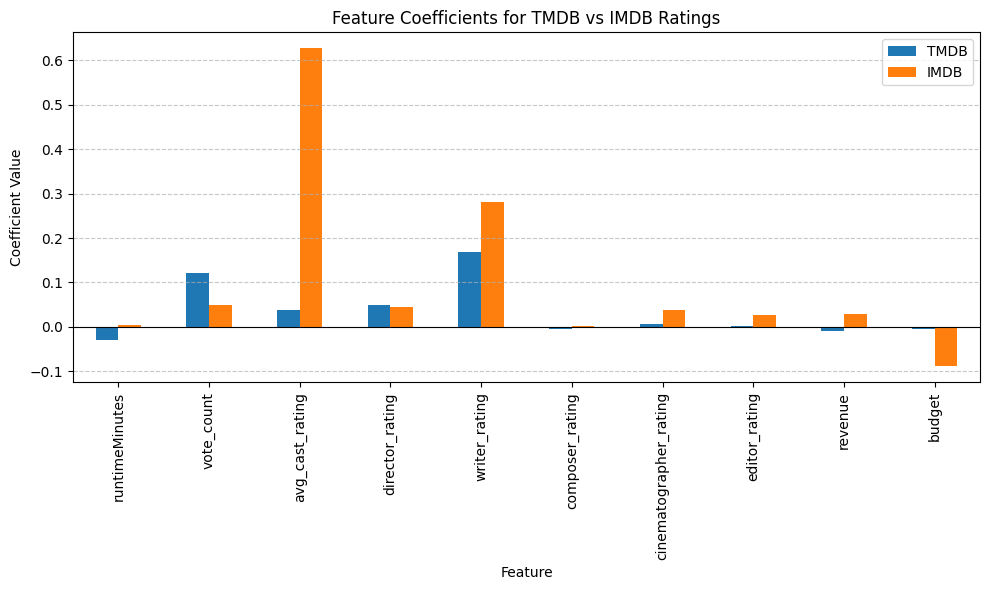

In [ ]:
plt.figure(figsize=(10,6))
coef_df.plot(kind='bar', figsize=(10,6))
plt.title('Feature Coefficients for TMDB vs IMDB Ratings')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()


Correlation analysis revealed that vote count — a proxy for audience exposure — is the second strongest correlate of revenue after budget. This suggests that marketing reach and audience engagement play critical roles in driving financial success.

However, regression results indicate that these same variables exhibit weak or even negative relationships with ratings, reinforcing a distinction between commercial popularity and perceived quality.

GENRE

In [ ]:
# Split genres into lists
df['genre_list'] = df['genre'].str.split(', ')
df['num_genres'] = df['genre_list'].apply(len)

# Weighted revenue and rating
df['weighted_revenue'] = df['revenue'] / df['num_genres']
df['weighted_rating'] = df['imdb_rating'] / df['num_genres']

# Explode genre list directly (no ast.literal_eval needed)
df_exploded = df.explode('genre_list')

# Now group by genre
genre_stats = df_exploded.groupby('genre_list').agg({
    'weighted_revenue': 'sum',
    'weighted_rating': 'mean',
    'title': 'count'
}).rename(columns={'title': 'count'}).reset_index()

print(genre_stats)


         genre_list  weighted_revenue  weighted_rating  count
0            Action      2.037184e+10         1.726200    494
1         Adventure      2.008166e+10         1.658733    320
2         Animation      2.587620e+09         1.556088     49
3            Comedy      1.040809e+10         2.216503    382
4             Crime      3.617428e+09         1.773132    244
5             Drama      9.254728e+09         2.299779    590
6            Family      4.457768e+09         1.608559     96
7           Fantasy      7.790968e+09         1.640941    162
8           History      6.391790e+08         2.135106     63
9            Horror      4.372098e+09         1.863863    227
10            Music      1.032999e+08         2.052833     20
11          Musical      3.002503e+08         1.855556     15
12          Mystery      3.214570e+09         1.683930    193
13          Romance      2.440732e+09         2.238297    139
14           Sci-Fi      5.764069e+09         1.446505    103
15  Scie

/tmp/ipython-input-2851404681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre_list'] = df['genre'].str.split(', ')
/tmp/ipython-input-2851404681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_genres'] = df['genre_list'].apply(len)
/tmp/ipython-input-2851404681.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

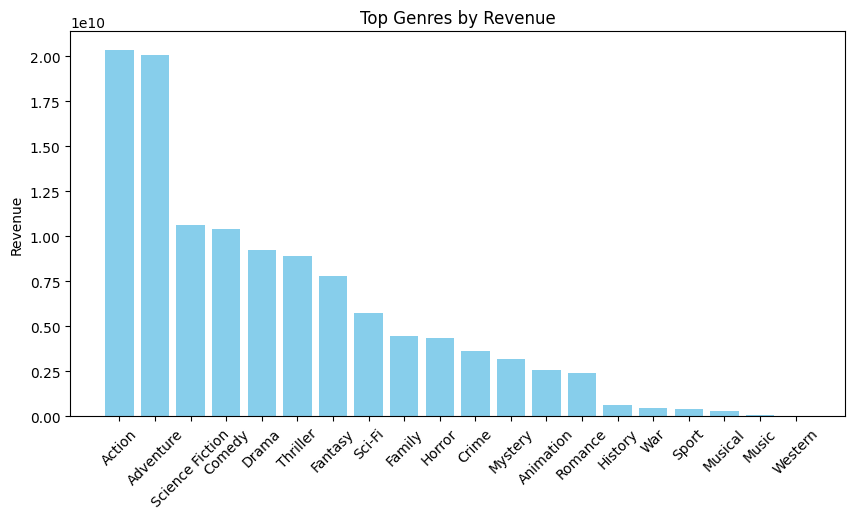

In [ ]:
# Top 10 by revenue
top_revenue = genre_stats.nlargest(20, 'weighted_revenue')

plt.figure(figsize=(10,5))
plt.bar(top_revenue['genre_list'], top_revenue['weighted_revenue'], color='skyblue')
plt.xticks(rotation=45)
plt.ylabel('Revenue')
plt.title('Top Genres by Revenue')
plt.show()

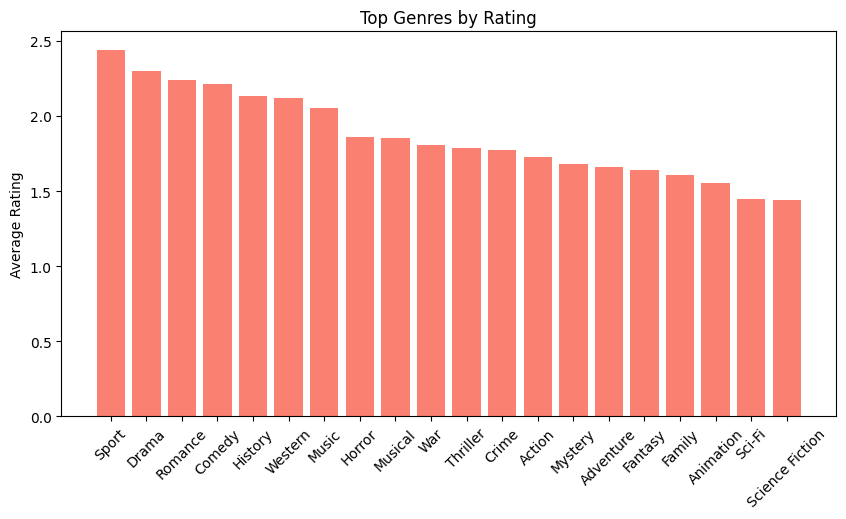

In [ ]:
# Top 10 by rating after filtering
top_rating = genre_stats.nlargest(20, 'weighted_rating')

plt.figure(figsize=(10,5))
plt.bar(top_rating['genre_list'], top_rating['weighted_rating'], color='salmon')
plt.xticks(rotation=45)
plt.ylabel('Average Rating')
plt.title('Top Genres by Rating')
plt.show()

Revenue vs Ratings:

Action, Adventure, and Science Fiction genres dominate revenue.

Drama, Comedy, Romance, and Sport dominate ratings.

This confirms genre-month analysis: big-budget action movies make money, but they don’t necessarily get the highest ratings.

Count column:

This shows how many movies contributed to each genre. Genres with very few movies (like Sport or Musical) can have high weighted ratings but are less representative.